# Axisymmetric Spacetimes 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Importing & Accessing data 

In [38]:
df = pd.read_csv("data.csv")
print(df)

theta = df["theta"].values
h = df["h"].values

           theta         h
0   1.000000e-08  0.349553
1   3.173327e-02  0.349599
2   6.346653e-02  0.349683
3   9.519979e-02  0.349816
4   1.269330e-01  0.350003
..           ...       ...
95  3.014660e+00  0.350003
96  3.046393e+00  0.349816
97  3.078126e+00  0.349683
98  3.109859e+00  0.349599
99  3.141593e+00  0.349553

[100 rows x 2 columns]


## Values of your own control!

In [41]:
# Modify the value here (from input.py):
Ntheta = 100
a = 0.9

# Modify with your own phi resolution! 
phi = np.linspace(0, 2*np.pi, Ntheta)

# Making a meshgrid of theta and phi values
phi_grid, theta_grid = np.meshgrid(phi, theta)

## Initial guess function $h(\theta)_{\text{guess}}$, from Input.py

### See here -> https://www.desmos.com/calculator/x6iyq0kvln

In [42]:
def hguess(t):
    # Modify the function here:
    return 0.5*(1 + 0.2*np.cos(4*t)) + 0.2

h0 = hguess(theta)
#print(h0)

## Conversion to Cartesian coordinates for 3D visualisations

In [43]:
def cartesian(r, t, p):
    x = np.sqrt(r**2 + a**2)*np.sin(t)*np.cos(p)
    y = np.sqrt(r**2 + a**2)*np.sin(t)*np.sin(p)
    z = r*np.cos(t)
    return x, y, z

In [44]:
# Make h0 and h 2D arrays matching theta_grid
h0_2d = np.tile(h0[:, np.newaxis], (1, phi_grid.shape[1]))
h_2d = np.tile(h[:, np.newaxis], (1, phi_grid.shape[1]))

# Converting to Cartesian 
x0, y0, z0 = cartesian(h0_2d, theta_grid, phi_grid)
xsol, ysol, zsol= cartesian(h_2d, theta_grid, phi_grid)

## Plotting! 

### 2D Visualisation

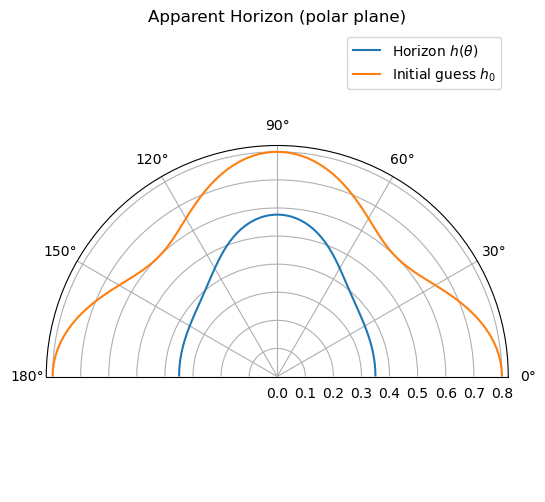

In [45]:
fig2D_polar = plt.figure(figsize=(15, 6))
ax = fig2D_polar.add_subplot(111, polar=True)

ax.set_thetamin(0)
ax.set_thetamax(180)
ax.plot(theta, h, label=r"Horizon $h(\theta)$")
ax.plot(theta, h0, label=r"Initial guess $h_0$")
ax.set_title("Apparent Horizon (polar plane)")
ax.legend()

plt.show()

### 3D Visualisation

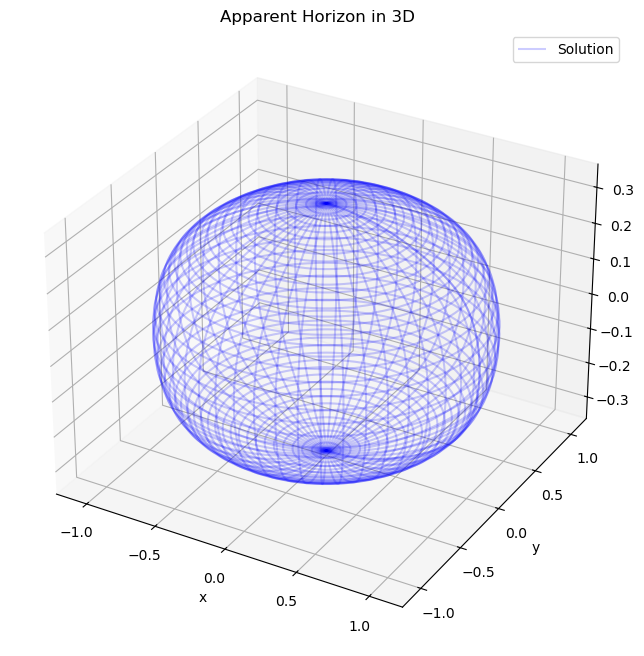

In [46]:
fig3D = plt.figure(figsize=(10,8))
ax = fig3D.add_subplot(111, projection='3d')

#ax.scatter(x0, y0, z0, c="orange", label="Initial guess", s=10)
#ax.scatter(xsol, ysol, zsol, c="blue", label="Solution", s=10)
#ax.plot_wireframe(x0, y0, z0, color="red", alpha=0.5, label="Initial guess")
ax.plot_wireframe(xsol, ysol, zsol, color="blue", alpha=0.2, label="Solution")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title("Apparent Horizon in 3D")
ax.legend()
plt.show()

### Cross section of 3D plot above

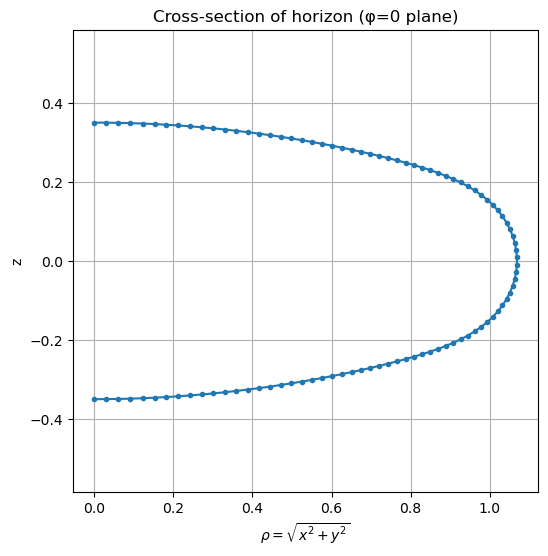

In [47]:
i_phi = 0  # slice at phi = 0 plane
x_slice = xsol[:, i_phi]
y_slice = ysol[:, i_phi]
z_slice = zsol[:, i_phi]

rho_slice = np.sqrt(x_slice**2 + y_slice**2)

plt.figure(figsize=(6,6))
plt.plot(rho_slice, z_slice, '-o', markersize=3)
plt.xlabel(r'$\rho = \sqrt{x^2 + y^2}$')
plt.ylabel('z')
plt.title('Cross-section of horizon (φ=0 plane)')
plt.axis('equal')
plt.grid(True)
plt.show()